<a href="https://colab.research.google.com/github/Tanmoy-94/Structural-Dynamics-/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving AIR QUALITY INDEX.csv to AIR QUALITY INDEX (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
AQI_df=pd.read_csv('AIR QUALITY INDEX.csv')
AQI_df.head()

,Place,Date,PM 2.5,PM10,NO2,NH3,SO2,CO,O3,Air Quality Index,DOMINANT AIR POLLUTANT
0,RABINDRA BHARATI UNIVERSITY,17-09-2019,48,58,17,3,7,10,11,58,0
1,RABINDRA BHARATI UNIVERSITY,19-09-2019,38,31,13,3,6,10,10,38,PM10
2,RABINDRA BHARATI UNIVERSITY,19-09-2019,28,32,16,3,6,8,24,32,PM10
3,RABINDRA BHARATI UNIVERSITY,20-09-2019,0,0,0,0,0,0,0,0,TROP O3
4,RABINDRA BHARATI UNIVERSITY,21-09-2019,72,86,43,3,16,20,35,86,PM2.5


In [ ]:
zero_coloumns=AQI_df.columns[(AQI_df==0).all(axis=0)]
zero_rows=AQI_df.index[(AQI_df==0).all(axis=1)]
AQI_df=AQI_df.drop(zero_rows, axis=0)
AQI_df=AQI_df.drop(zero_coloumns, axis=1)
AQI_df.head(100)


,Place,Date,PM 2.5,PM10,NO2,NH3,SO2,CO,O3,Air Quality Index,DOMINANT AIR POLLUTANT
0,RABINDRA BHARATI UNIVERSITY,17-09-2019,48,58,17,3,7,10,11,58,0
1,RABINDRA BHARATI UNIVERSITY,19-09-2019,38,31,13,3,6,10,10,38,PM10
2,RABINDRA BHARATI UNIVERSITY,19-09-2019,28,32,16,3,6,8,24,32,PM10
3,RABINDRA BHARATI UNIVERSITY,20-09-2019,0,0,0,0,0,0,0,0,TROP O3
4,RABINDRA BHARATI UNIVERSITY,21-09-2019,72,86,43,3,16,20,35,86,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...
85,BIDHAN NAGAR,27-09-2019,23,19,6,2,6,20,29,29,CO
86,BIDHAN NAGAR,28-09-2019,24,24,6,2,7,18,22,24,PM2.5
87,BIDHAN NAGAR,29-09-2019,22,20,6,2,6,11,26,26,O3
88,BIDHAN NAGAR,30-09-2019,15,18,6,2,7,17,36,36,O3


In [ ]:
print(AQI_df.columns)

Index(['Place', 'Date', 'PM 2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3',
       'Air Quality Index', 'DOMINANT AIR POLLUTANT'],
      dtype='object')


In [ ]:
import plotly.express as px

# AQI Trend Over Time
fig1 = px.line(AQI_df, x='Date', y='Air Quality Index', color='Place', title='AQI Trend Over Time')
fig1.show()

# AQI Distribution by City
fig2 = px.box(AQI_df, x='Place', y='Air Quality Index', title='AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

# Scatter Plot Matrix for selected features
selected_features = ['PM 2.5', 'NO2', 'CO', 'O3', 'Air Quality Index']
fig3 = px.scatter_matrix(AQI_df[selected_features], title='Scatter Plot Matrix')
fig3.show()

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_columns = ['PM 2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3']
# Splitting the dataset into features (X) and target (y)
X = AQI_df[feature_columns]
y = AQI_df['Air Quality Index']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 1562.2314 - val_loss: 1481.7781
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1580.0833 - val_loss: 1474.8051
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1645.3978 - val_loss: 1467.7324
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1570.7286 - val_loss: 1460.4479
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1557.5320 - val_loss: 1452.8822
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1701.1062 - val_loss: 1445.1119
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1648.4739 - val_loss: 1437.5458
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1701.7041 - val_loss: 1430.1292
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1578.0446 - val_loss: 1422.5033
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1549.4384 - val_loss: 1414.5093
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1595.2386 - val_loss: 1405.9136
Epoch 1

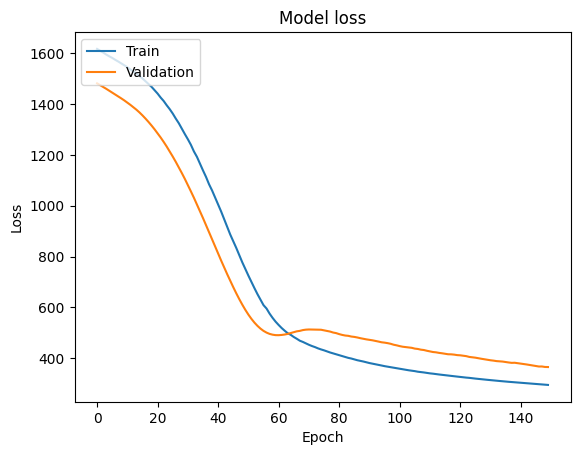

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 281.0271
Mean Squared Error on Test Data: 281.027099609375


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

In [ ]:
model.save('model.h5')
user_input = pd.DataFrame({
    'PM 2.5': [45],
    'PM10': [45],
    'NO2': [58],
    'NH3': [73],
    'CO': [29],
    'SO2': [54],
    'O3': [27],

})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted AQI: 479.7331237792969
